In [ ]:

!pip -q install ucimlrepo kneed scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             adjusted_rand_score,
                             silhouette_score)







In [ ]:
# загрузка и подготовка данных
beans = fetch_ucirepo(id=602)               # Dry Bean Dataset
X = beans.data.features                     # 16 числовых признаков
y = beans.data.targets['Class']             # истинные сорта

# Стандартизация признаков — DBSCAN «чувствителен» к шкале
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


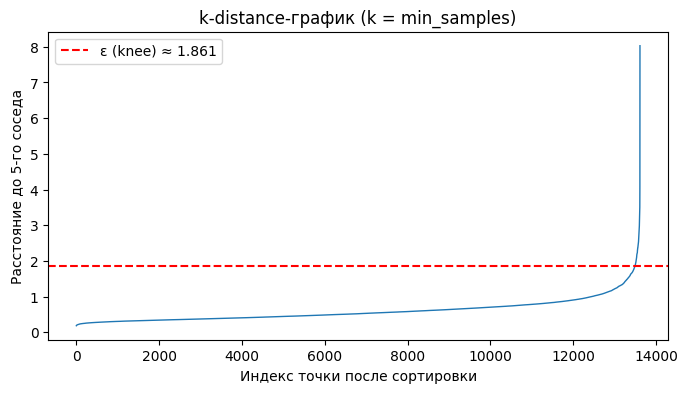

Автоматически выбран ε ≈ 1.861


In [ ]:
# k-distance plot («локоть»)
min_samples = 5                             # minPts (можно 4–10)
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:, -1])     # расстояния до k-го соседа

# Строим график
plt.figure(figsize=(8, 4))
plt.plot(k_distances, linewidth=1)
plt.title('k-distance-график (k = min_samples)')
plt.xlabel('Индекс точки после сортировки')
plt.ylabel(f'Расстояние до {min_samples}-го соседа')

# Автоматический поиск «колена»
kneedle = KneeLocator(range(len(k_distances)), k_distances,
                      curve='convex', direction='increasing')
eps = k_distances[kneedle.knee]             # оптимальное ε
plt.axhline(eps, linestyle='--', color='red',
            label=f'ε (knee) ≈ {eps:.3f}')
plt.legend()
plt.show()

print(f'Автоматически выбран ε ≈ {eps:.3f}')


In [ ]:
# обучение DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
clusters = db.fit_predict(X_scaled)         # -1 = шумовые точки

print(f'Найдено кластеров (без шума): {len(set(clusters) - {-1})}')

Найдено кластеров (без шума): 1


In [ ]:

# сопоставляем кластеры с реальными метками
label_map = {}                              # majority vote
for cl in set(clusters) - {-1}:
    label_map[cl] = y[clusters == cl].mode()[0]

y_pred = pd.Series([label_map.get(cl, 'noise') for cl in clusters])


In [ ]:
labels_order = list(y.unique()) + ['noise']
cm = confusion_matrix(y, y_pred, labels=labels_order)

disp = ConfusionMatrixDisplay(cm, display_labels=labels_order)
disp.plot(figsize=(7, 7), cmap='Blues', xticks_rotation=45,
          colorbar=False)
plt.title('Confusion Matrix — DBSCAN на Dry Bean')
plt.show()

print('Adjusted Rand Index (ARI):', adjusted_rand_score(y, clusters))
print('Silhouette Score:', silhouette_score(X_scaled, clusters))

TypeError: ConfusionMatrixDisplay.plot() got an unexpected keyword argument 'figsize'

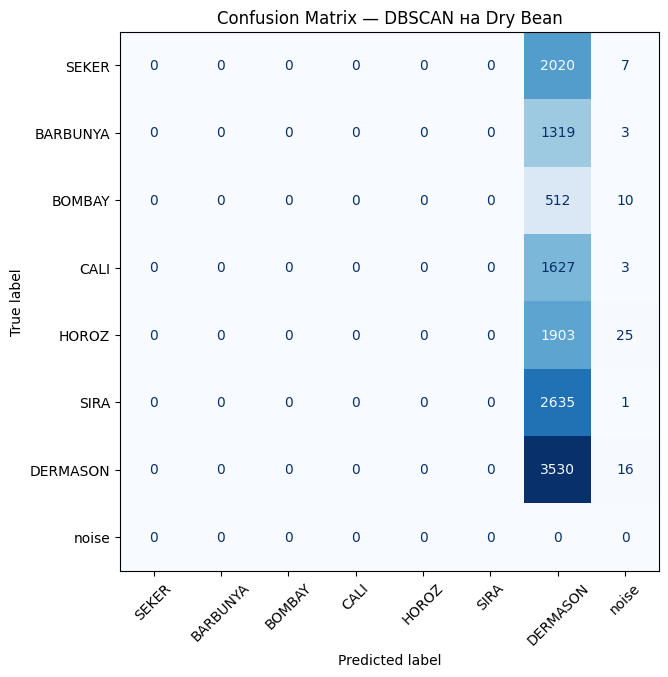

Adjusted Rand Index (ARI): 0.0004568057811283091
Silhouette Score: 0.48990186177073575


In [ ]:
# сопоставляем кластеры с реальными метками
label_map = {}                              # majority vote
for cl in set(clusters) - {-1}:
    label_map[cl] = y[clusters == cl].mode()[0]

y_pred = pd.Series([label_map.get(cl, 'noise') for cl in clusters])

labels_order = list(y.unique()) + ['noise']
cm = confusion_matrix(y, y_pred, labels=labels_order)

# Create a figure and axes to control the size
fig, ax = plt.subplots(figsize=(7, 7))

disp = ConfusionMatrixDisplay(cm, display_labels=labels_order)
# Pass the axes to the plot method
disp.plot(cmap='Blues', xticks_rotation=45, colorbar=False, ax=ax)
plt.title('Confusion Matrix — DBSCAN на Dry Bean')
plt.show()

print('Adjusted Rand Index (ARI):', adjusted_rand_score(y, clusters))
print('Silhouette Score:', silhouette_score(X_scaled, clusters))

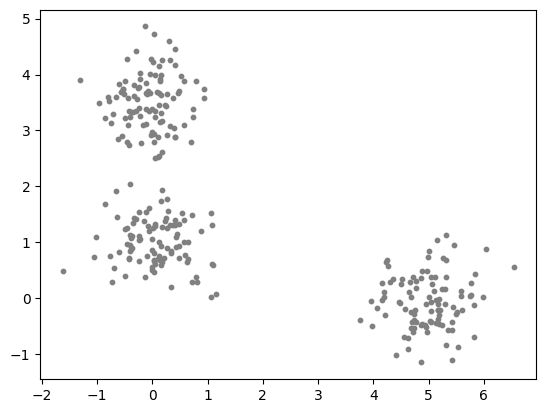

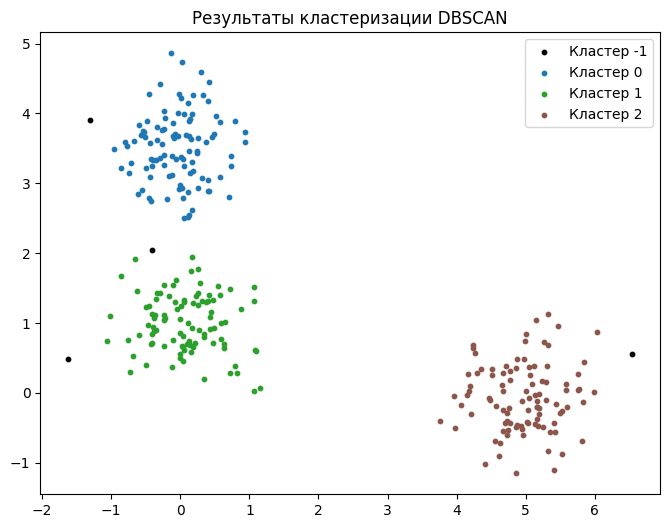

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=(0, 3.5), scale=0.5, size=(100, 2)),
    np.random.normal(loc=(0, 1), scale=0.5, size=(100, 2)),
    np.random.normal(loc=(5, 0), scale=0.5, size=(100, 2))
])

plt.scatter(X[:, 0], X[:, 1], s=10, color='gray')
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)


df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = labels

plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)

for label in unique_labels:
    mask = (labels == label)
    color = 'black' if label == -1 else plt.cm.tab10(label / len(unique_labels))
    plt.scatter(X[mask, 0], X[mask, 1], s=10, color=color, label=f'Кластер {label}')

plt.title("Результаты кластеризации DBSCAN")
plt.legend()
plt.show()

In [ ]:
# сопоставляем кластеры с реальными метками
label_map = {}                              # majority vote
for cl in set(clusters) - {-1}:
    label_map[cl] = y[clusters == cl].mode()[0]

y_pred = pd.Series([label_map.get(cl, 'noise') for cl in clusters])


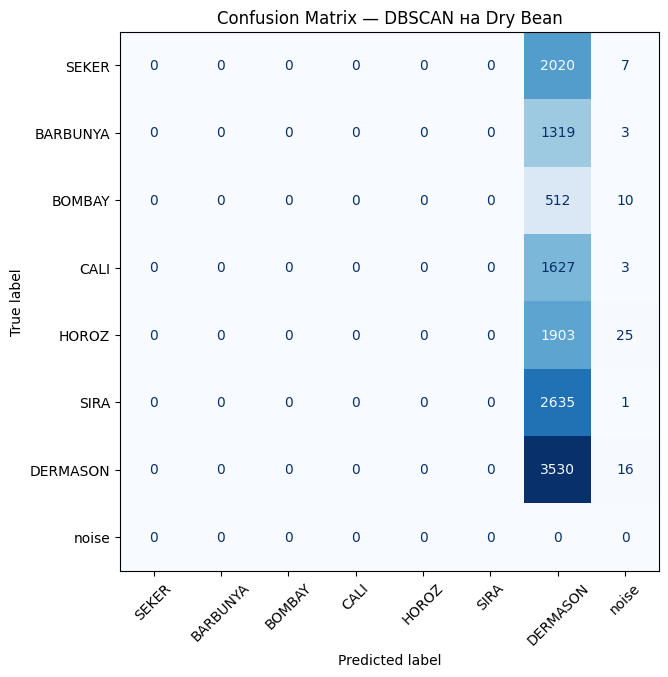

Adjusted Rand Index (ARI): 0.0004568057811283091
Silhouette Score: 0.48990186177073575


In [ ]:
# сопоставляем кластеры с реальными метками
label_map = {}                              # majority vote
for cl in set(clusters) - {-1}:
    label_map[cl] = y[clusters == cl].mode()[0]

y_pred = pd.Series([label_map.get(cl, 'noise') for cl in clusters])

labels_order = list(y.unique()) + ['noise']
cm = confusion_matrix(y, y_pred, labels=labels_order)

# Create a figure and axes to control the size
fig, ax = plt.subplots(figsize=(7, 7))

disp = ConfusionMatrixDisplay(cm, display_labels=labels_order)
# Pass the axes to the plot method
disp.plot(cmap='Blues', xticks_rotation=45, colorbar=False, ax=ax)
plt.title('Confusion Matrix — DBSCAN на Dry Bean')
plt.show()

print('Adjusted Rand Index (ARI):', adjusted_rand_score(y, clusters))
print('Silhouette Score:', silhouette_score(X_scaled, clusters))

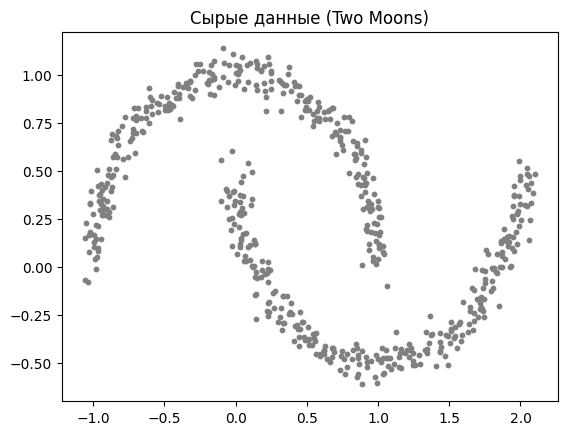

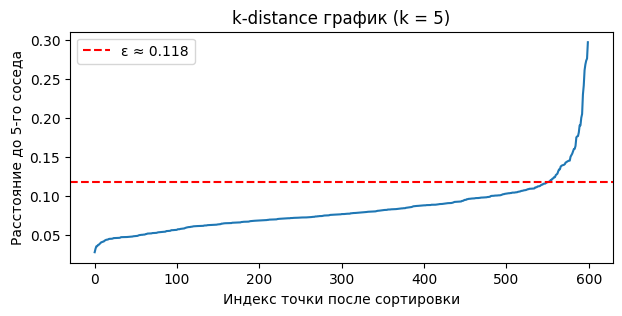

★ Оптимальный радиус ε найден автоматически: 0.118
Найдено кластеров (без учёта шума): 2


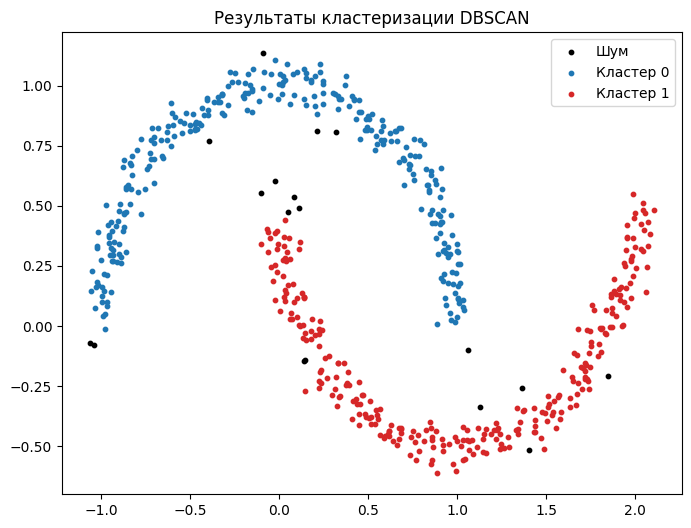

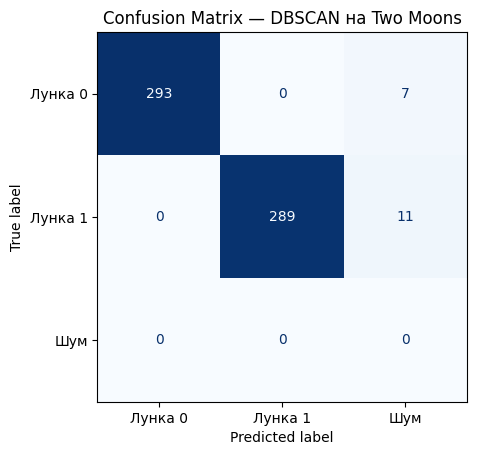

Adjusted Rand Index (ARI): 0.9409290711167496


In [ ]:

!pip -q install kneed scikit-learn pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons                 # "серпы"
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score

# генерация «серповидного» датасета
# 600 точек, лёгкий шум noise=0.05, чтобы кластеры не были идеальными
X, y_true = make_moons(n_samples=600, noise=0.05, random_state=42)

# Визуально посмотрим на разброс
plt.scatter(X[:, 0], X[:, 1], s=10, color='gray')
plt.title('Сырые данные (Two Moons)')
plt.show()

# стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# k-distance график «метод локтя» для DBSCAN
min_samples = 5                               # minPts
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:, -1])       # расстояния до k-го соседа

# Рисуем кривую
plt.figure(figsize=(7, 3))
plt.plot(k_distances)
plt.title(f'k-distance график (k = {min_samples})')
plt.xlabel('Индекс точки после сортировки')
plt.ylabel(f'Расстояние до {min_samples}-го соседа')

# Ищем «колено» автоматически библиотекой kneed
kneedle = KneeLocator(range(len(k_distances)), k_distances,
                      curve='convex', direction='increasing')
eps = k_distances[kneedle.knee]               # оптимальное ε
plt.axhline(eps, linestyle='--', color='red', label=f'ε ≈ {eps:.3f}')
plt.legend()
plt.show()

print(f'★ Оптимальный радиус ε найден автоматически: {eps:.3f}')

# обучение DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_scaled)             # -1 = шумовые точки

print(f'Найдено кластеров (без учёта шума): {len(set(labels) - {-1})}')

# визуализация кластеров
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
for label in unique_labels:
    mask = (labels == label)
    color = 'black' if label == -1 else plt.cm.tab10(label / len(unique_labels))
    name = 'Шум' if label == -1 else f'Кластер {label}'
    plt.scatter(X[mask, 0], X[mask, 1], s=10, color=color, label=name)

plt.title('Результаты кластеризации DBSCAN')
plt.legend()
plt.show()

# Confusion Matrix + ARI (оценка качества)
# Поскольку у нас синтетический датасет, «истина» y_true известна
# Сопоставим номер кластера → настоящий класс через majority-vote
mapping = {}
for cl in set(labels) - {-1}:
    mapping[cl] = pd.Series(y_true[labels == cl]).mode()[0]

y_pred = np.array([mapping.get(cl, -1) for cl in labels])  # -1 = шум

# Матрица ошибок
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, -1])
disp = ConfusionMatrixDisplay(cm, display_labels=['Лунка 0', 'Лунка 1', 'Шум'])
disp.plot(cmap='Blues', colorbar=False)
plt.title('Confusion Matrix — DBSCAN на Two Moons')
plt.show()

# Дополнительная метрика
print('Adjusted Rand Index (ARI):', adjusted_rand_score(y_true, labels))
